In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import glob as glob

In [3]:
df=pd.read_csv('./gdrive/My Drive/Deanonymization/all_three.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427625 entries, 0 to 427624
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        427625 non-null  int64  
 1   balance           427625 non-null  float64
 2   label             427625 non-null  int64  
 3   rec/sent          427625 non-null  int64  
 4   amount            427625 non-null  float64
 5   block_id          427625 non-null  int64  
 6   size              427625 non-null  int64  
 7   weight            427625 non-null  int64  
 8   version           427625 non-null  int64  
 9   lock_time         427625 non-null  int64  
 10  is_coinbase       427625 non-null  int64  
 11  has_witness       427625 non-null  int64  
 12  input_count       427625 non-null  int64  
 13  output_count      427625 non-null  int64  
 14  input_total       427625 non-null  int64  
 15  input_total_usd   427625 non-null  float64
 16  output_total      42

In [5]:
df['label'].value_counts()

0    335847
2     55390
3     34134
1      2254
Name: label, dtype: int64

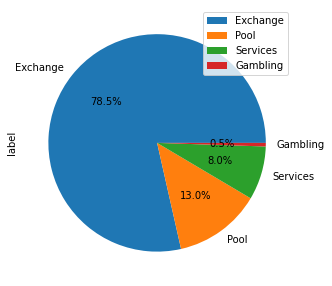

In [6]:
pf2=pd.DataFrame({'label':[335847,55390,34134,2254]},
                index=['Exchange','Pool','Services' ,'Gambling'])
plt=pf2.plot.pie(y='label',autopct='%1.1f%%',figsize=(5,5))

In [7]:
df=df.dropna()

In [8]:
df.describe()

,Unnamed: 0,balance,label,rec/sent,amount,block_id,size,weight,version,lock_time,is_coinbase,has_witness,input_count,output_count,input_total,input_total_usd,output_total,output_total_usd,fee,fee_usd,fee_per_kb,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total
count,427625.000000,427625.000000,427625.000000,427625.000000,427625.000000,427625.000000,427625.000000,427625.000000,427625.000000,4.276250e+05,427625.000000,427625.000000,427625.000000,427625.000000,4.276250e+05,4.276250e+05,4.276250e+05,4.276250e+05,4.276250e+05,427625.000000,4.276250e+05,427625.000000,427625.000000,427625.000000,4.276250e+05
mean,213812.000000,1764.415320,0.503797,0.360257,0.340346,662529.146724,3169.557783,12088.293664,1.419917,1.832077e+05,0.000985,0.338818,7.377964,59.161438,1.315696e+09,3.497906e+05,1.316072e+09,3.498908e+05,3.060619e+05,78.020832,1.154991e+05,28.902831,30679.232660,7.686147,7.934563e+01
std,123444.848769,1116.134571,0.993972,0.480076,8.252891,3930.004440,6214.262363,22873.109855,0.493546,4.933742e+06,0.031361,0.473308,25.610197,141.183523,2.444449e+10,6.382488e+06,2.444445e+10,6.382479e+06,8.679863e+05,218.047923,9.249079e+04,21.584634,23223.212536,5.413149,6.793412e+03
min,0.000000,0.000000,0.000000,0.000000,0.000005,654933.000000,188.000000,441.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,5.550000e+02,8.590000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-2.405169e-04
25%,106906.000000,477.063420,0.000000,0.000000,0.001996,659128.000000,404.000000,1476.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.000000,3.173461e+07,7.648306e+03,3.189091e+07,7.711095e+03,4.007300e+04,10.294000,5.127710e+04,11.523600,17040.900000,3.431100,2.796210e-02
50%,213812.000000,2072.798521,0.000000,0.000000,0.010299,663459.000000,660.000000,2576.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,12.000000,1.786560e+08,4.574205e+04,1.795588e+08,4.593981e+04,8.953900e+04,23.731100,9.805470e+04,25.986700,26754.300000,7.178300,3.963194e-01
75%,320718.000000,2681.494380,0.000000,1.000000,0.052883,665772.000000,2830.000000,9980.000000,2.000000,6.550450e+05,0.000000,1.000000,2.000000,38.000000,7.249104e+08,1.981820e+05,7.247281e+08,1.985504e+05,2.021000e+05,48.673700,1.457850e+05,43.333900,36670.800000,11.105000,4.981148e+00
max,427624.000000,4084.660204,3.000000,1.000000,2000.000000,668545.000000,190313.000000,561032.000000,2.000000,1.611268e+09,1.000000,1.000000,1009.000000,4231.000000,5.430189e+12,1.654712e+09,5.430188e+12,1.654712e+09,2.084067e+07,4716.833500,2.803740e+06,1034.214800,700935.000000,258.553900,3.412928e+06


In [9]:
# from sklearn import preprocessing
# def peenc(df):
#   label_encoder=preprocessing.LabelEncoder()
#   df['label']=label_encoder.fit_transform(df['label'])
#   df['rec/sent']=label_encoder.fit_transform(df['rec/sent'])
# peenc(df) 

In [10]:
df['label'].value_counts()

0    335847
2     55390
3     34134
1      2254
Name: label, dtype: int64

In [11]:
df=df.drop('balance',axis=1)

In [12]:
def f1():
  X=df.drop('label',axis=1)
  y=df['label']
  #print(y.value_counts())
  return X,y
X,y=f1()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
def f2():
  X,y=f1()
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
  norm = MinMaxScaler().fit(X_train)
  X_train = norm.transform(X_train)
  X_test = norm.transform(X_test)
  sm = SMOTE(random_state = 2)
  X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
  return X_train,X_test,y_train,y_test,X_train_res,y_train_res
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f2()
def f3():
  return X_train,X_test,y_train,y_test,X_train_res,y_train_res;

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [14]:
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

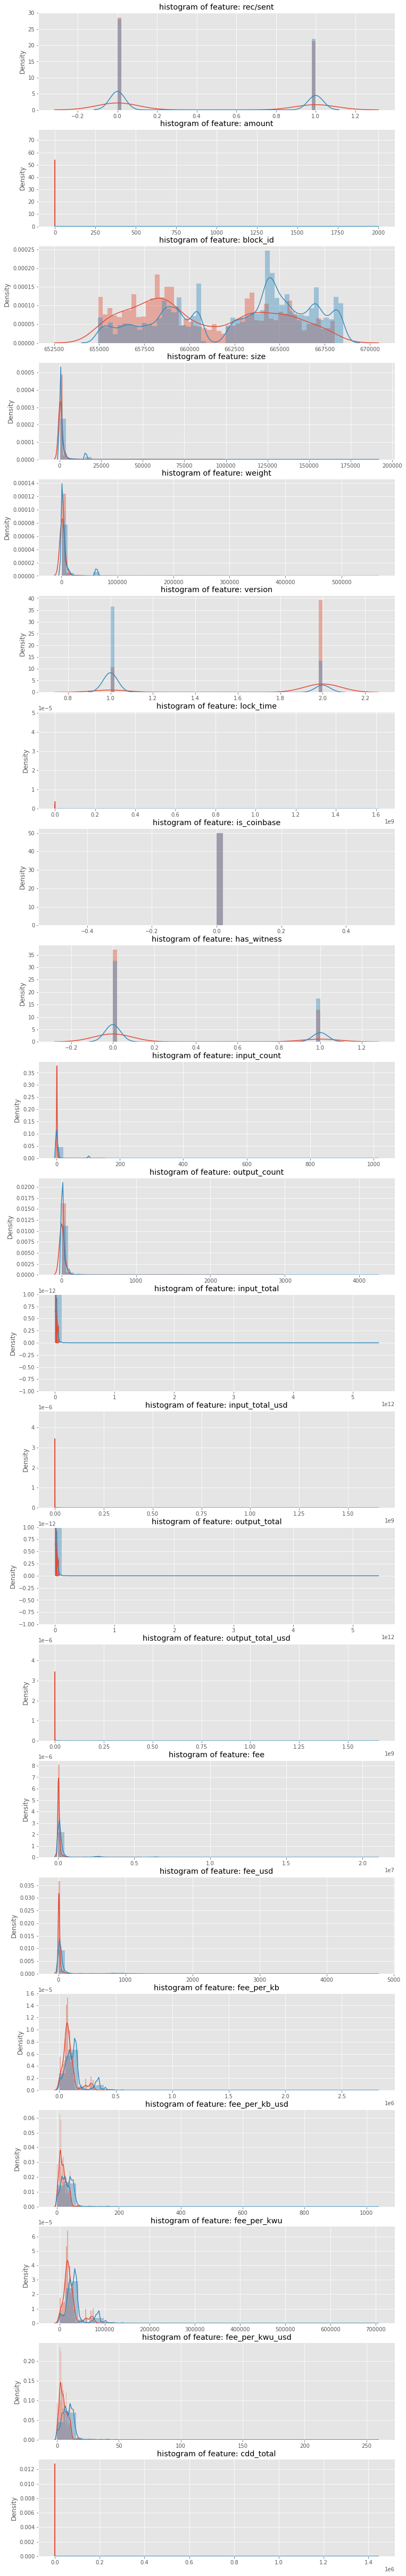

In [15]:
# visual libraries
import warnings 
warnings.filterwarnings(action= 'ignore')
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


anomalous_features = df.iloc[:,2:25].columns

plt.figure(figsize=(12,24*4))
gs = gridspec.GridSpec(24, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.label == 1], bins=50)
    sns.distplot(df[cn][df.label == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

**Decision_Tree**

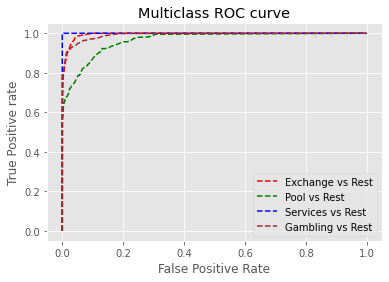

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  ovr=OneVsRestClassifier(dtc)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Pool vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Services vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Gambling vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [17]:
from sklearn.tree import DecisionTreeClassifier
def DTC():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f2()
  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  dtc.fit(X_train,y_train)
  dtc_res=DecisionTreeClassifier(criterion='entropy',max_depth=6)
  dtc_res.fit(X_train_res,y_train_res)
  print("CV Accuracy")
  print(dtc.score(X_test,y_test))
  print("CV Accuracy after SMOTE")
  print(dtc_res.score(X_test,y_test))
DTC()

CV Accuracy
0.9761662005294321
CV Accuracy after SMOTE
0.8734039866425959


**KNN**

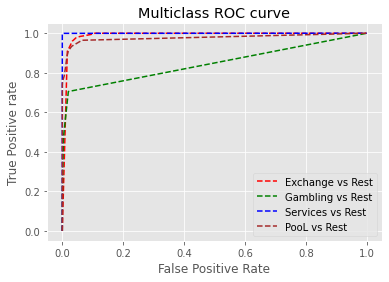

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  dtc=KNeighborsClassifier(n_neighbors=10)
  ovr=OneVsRestClassifier(dtc)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Gambling vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Services vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='PooL vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
def cls3():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f2()
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(X_train,y_train)
  knn_res=KNeighborsClassifier(n_neighbors=10)
  knn_res.fit(X_train_res,y_train_res)
  print("CV Accuracy")
  print(knn.score(X_test,y_test))
  print("CV Accuracy after SMOTE")
  print(knn_res.score(X_test,y_test))
cls3()

CV Accuracy
0.9738744890418776
CV Accuracy after SMOTE
0.9394520471063634


**Random_Forest**

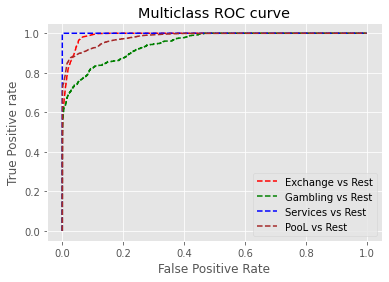

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  rf=RandomForestClassifier(max_depth=5,random_state=0)
  ovr=OneVsRestClassifier(rf)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Gambling vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Services vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='PooL vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [21]:
from sklearn.ensemble import RandomForestClassifier
def cls4():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  rf=RandomForestClassifier(max_depth=5,random_state=0)
  rf.fit(X_train,y_train)
  rfs=RandomForestClassifier(max_depth=5,random_state=0)
  rfs.fit(X_train_res,y_train_res)
  print(rf.score(X_test,y_test))
  print(rfs.score(X_test,y_test))
cls4()

0.9658207600998999
0.827111414593993


**Adaptive Boosting**

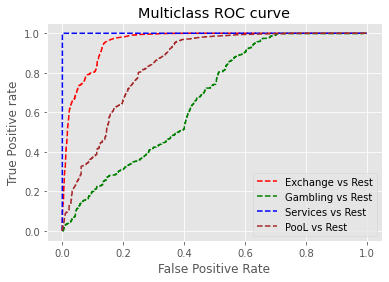

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  ab=AdaBoostClassifier(n_estimators=100,random_state=0)
  ovr=OneVsRestClassifier(ab)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Gambling vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Services vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='PooL vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [23]:
from sklearn.ensemble import AdaBoostClassifier
def cls5():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  ab=AdaBoostClassifier(n_estimators=100,random_state=0)
  ab.fit(X_train,y_train)
  abs=AdaBoostClassifier(n_estimators=100,random_state=0)
  abs.fit(X_train_res,y_train_res)
  print(ab.score(X_test,y_test))
  print(abs.score(X_test,y_test))
cls5()

0.8344635992030457
0.43670667028351745


**Gredient_Boosting**

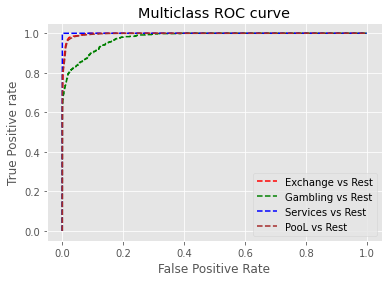

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
def cls1():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  gcb=gcb=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  ovr=OneVsRestClassifier(gcb)
  ovr.fit(X_train,y_train)
  return ovr.predict_proba(X_test),y_test
pp,y_test=cls1()
fpr = {}
tpr = {}
thresh ={}
n_class = 4
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pp[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Exchange vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Gambling vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Services vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='PooL vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600); 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def cls5():
  X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
  gcb=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  gcb.fit(X_train,y_train)
  gcbs=GradientBoostingClassifier(n_estimators=100,max_depth=10,random_state=0)
  gcbs.fit(X_train_res,y_train_res)
  print(gcb.score(X_test,y_test))
  print(gcbs.score(X_test,y_test))
cls5()

**ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model =keras.models.Sequential([
    layers.Dense(units=300,activation='relu',input_shape=[9]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=29,activation ='softmax'),
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test,X_train_res,y_train_res=f3()
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=30)

In [ ]:
model_history.history

In [ ]:
model.evaluate(X_test,y_test)